# COVID19 classification using X-RAY images

### This projects helps to classify COVID19 along with other 2 diseases using lungs XRAY images. The classes are 
 1. COVID19
 2. Viral Pneumonia
 3. Normal
 4. Lung_Opacity

In [1]:
# Import `all the necessary libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt



In [2]:
data_folder = "/home/dipesh/Desktop/dipesh/covid_data"

In [3]:
for i in os.listdir(data_folder):
    print(i)

train
Normal.metadata.xlsx
Lung_Opacity.metadata.xlsx
valid
COVID.metadata.xlsx
Viral Pneumonia.metadata.xlsx
test


### Analyse the data on excel files

The parent folder consists of excel files for each labels which have information regarding the labels and patients

In [4]:
covid_df = pd.read_excel(os.path.join(data_folder,"COVID.metadata.xlsx"))
lung_opacity_df = pd.read_excel(os.path.join(data_folder,"Lung_Opacity.metadata.xlsx"))
viral_pneumonia_df = pd.read_excel(os.path.join(data_folder,"Viral Pneumonia.metadata.xlsx"))
normal_df = pd.read_excel(os.path.join(data_folder,"Normal.metadata.xlsx"))
covid_df
lung_opacity_df
viral_pneumonia_df
normal_df

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
...,...,...,...,...
3611,COVID-3612,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3612,COVID-3613,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3613,COVID-3614,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3614,COVID-3615,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
...,...,...,...,...
6007,Lung_Opacity-6008,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6008,Lung_Opacity-6009,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6009,Lung_Opacity-6010,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6010,Lung_Opacity-6011,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
...,...,...,...,...
1340,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1341,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1342,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1343,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
...,...,...,...,...
10187,NORMAL-10188,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10188,NORMAL-10189,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10189,NORMAL-10190,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10190,NORMAL-10191,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


The df consists of four columns. The "FILE NAME" column consists of name of the file inside the corresponding folders, image format, image size and the image url link for reference. As we see, the dataset is imbalance as there are more normal images and few pneumonia images

In [5]:
class ProcessImage:
    """
        Consists of methods to process images and plotting
    """
    def __init__(self,image_folder_path:str,no_of_images:int = 0):
        self.image_folder_path  = image_folder_path
        self.no_of_images = no_of_images
        
    def read_image(self) -> np.ndarray:
        images = []
        for i in os.listdir(self.image_folder_path):
            img_path = os.path.join(self.image_folder_path,i)
            img = cv2.imread(img_path)
            images.append(img)
        return images
    
    def plot_images(self):
        all_img = self.read_image()
        print(f"Total number of {os.path.basename(self.image_folder_path)} images: {len(all_img)}")
        if len(all_img) < self.no_of_images:
            raise Exception("No of selected images should be less than total images")
        images = random.sample(self.read_image(),self.no_of_images)
        fig = plt.figure(figsize=(20,15))
        for i in range(self.no_of_images):
            fig.add_subplot(1,self.no_of_images,i+1)
            plt.title(os.path.basename(self.image_folder_path))
            plt.imshow(images[i])
        plt.show(block=True)
        
    def prepare_data(self, data_type:str =="train"):
        labels = ["covid19","pneumonia","lung_opacity","normal"]
        data_path = os.path.join(self.image_folder_path,str(data_type))
        all_data = []
        all_labels = []
        for label in labels:
            label_path = os.path.join(data_path,label)
            label_index = labels.index(label)
            for img in tqdm(os.listdir(label_path)):
                try:
                    img_arr = cv2.imread(os.path.join(label_path,img))
                    img_resized_arr = cv2.resize(img_arr, (256,256))
                    all_data.append(img_resized_arr)
                    all_labels.append(label_index)
                except Exception as e:
                    print(e)
            logger.info(f"Image data extraction successful for {label}")
        all_data = np.array(all_data)/255
        all_labels = np.array(all_labels)
        all_data.reshape(-1,256,256,1)
        return (all_data, all_labels)

In [9]:
covid_folder = os.path.join(data_folder,"train","covid19")
pneumonia_folder = os.path.join(data_folder,"train","pneumonia")
lung_opacity_folder = os.path.join(data_folder,"train","lung_opacity")
normal_folder = os.path.join(data_folder,"train","normal")

Total number of normal images: 1020


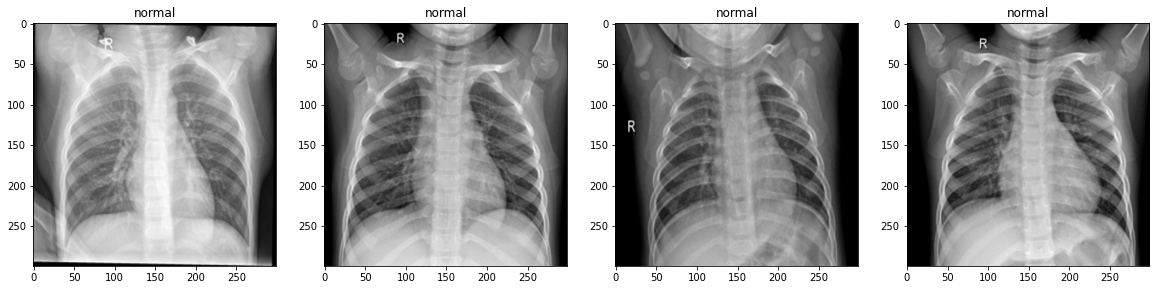

In [10]:
imgs = ProcessImage(normal_folder,4)
imgs.plot_images()

Total number of covid19 images: 1034


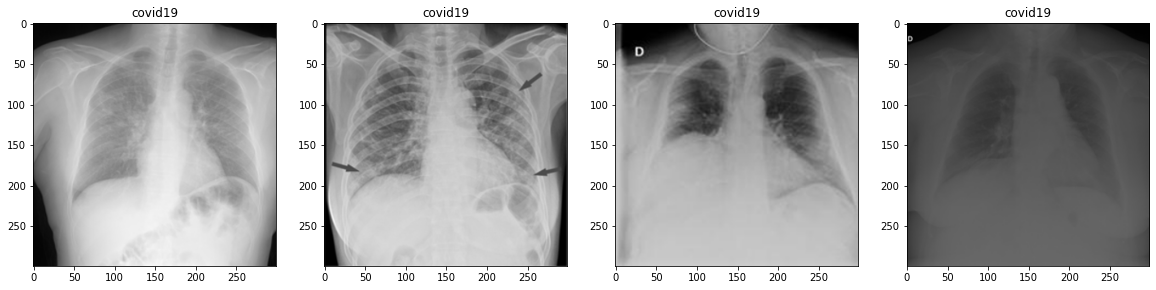

In [7]:
imgs = ProcessImage(covid_folder,4)
imgs.plot_images()

Total number of pneumonia images: 1032


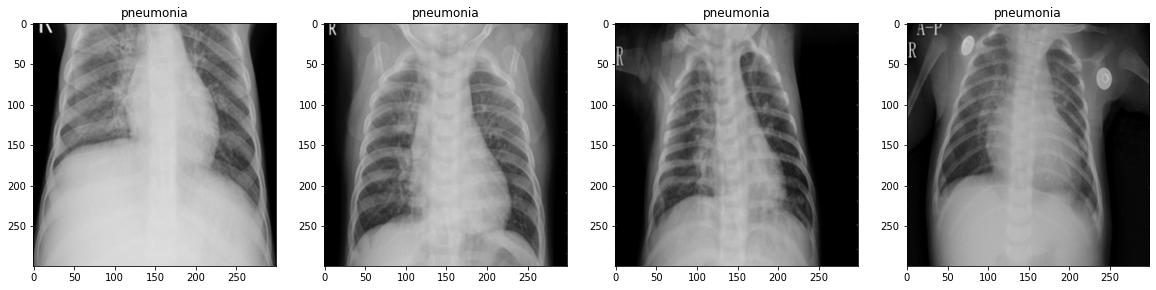

In [11]:
imgs = ProcessImage(pneumonia_folder,4)
imgs.plot_images()

Total number of lung_opacity images: 1023


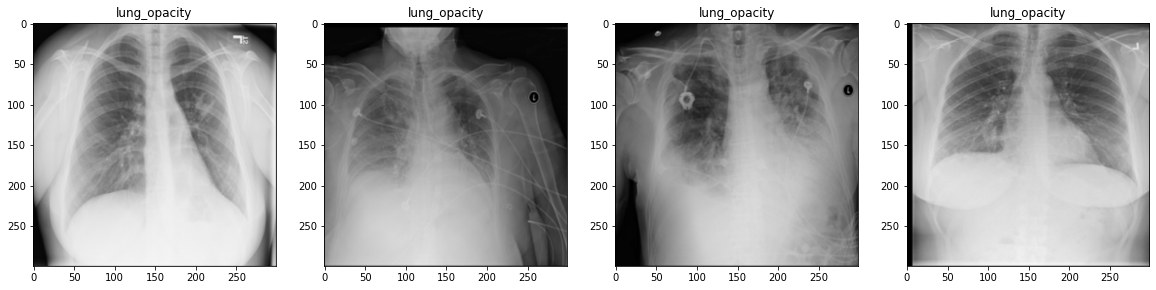

In [12]:
imgs = ProcessImage(lung_opacity_folder,4)
imgs.plot_images()

Here, the classes (labels) are imbalanced. "Normal" images has large no. of images and viral pneumonia has very low number of images. We will oversample the data which has low number of images

We will be using keras for training and inference in the images

In [14]:
train_dir = "/home/dipesh/Desktop/dipesh/covid_data/train"
valid_dir = "/home/dipesh/Desktop/dipesh/covid_data/valid"

In [15]:
import keras, os
import tensorflow as tf
from loguru import logger
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

2021-10-31 22:44:03.277855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-31 22:44:03.277878: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Class "ProcessImage" is prepared in order to get the required data and prepared it required format for input to the model"

In [ ]:
class ProcessImage:
    """
        Consists of methods to process images and plotting
    """
    def __init__(self,image_folder_path:str,no_of_images:int):
        self.image_folder_path  = image_folder_path
        self.no_of_images = no_of_images
        
    def read_image(self) -> np.ndarray:
        images = []
        for i in os.listdir(self.image_folder_path):
            img_path = os.path.join(self.image_folder_path,i)
            img = cv2.imread(img_path)
            images.append(img)
        return images
    
    def plot_images(self):
        all_img = self.read_image()
        print(f"Total number of {os.path.basename(self.image_folder_path)} images: {len(all_img)}")
        if len(all_img) < self.no_of_images:
            raise Exception("No of selected images should be less than total images")
        images = random.sample(self.read_image(),self.no_of_images)
        fig = plt.figure(figsize=(20,15))
        for i in range(self.no_of_images):
            fig.add_subplot(1,self.no_of_images,i+1)
            plt.title(os.path.basename(self.image_folder_path))
            plt.imshow(images[i])
        plt.show(block=True)
        
    def prepare_data(self, data_type: ="train"):
        labels = ["covid19","pneumonia","lung_opacity","normal"]
        data_path = os.path.join(self.image_folder_path,str(data_type))
        all_data = []
        all_labels = []
        for label in labels:
            label_path = os.path.join(data_path,label)
            label_index = labels.index(label)
            for img in os.listdir(label_path):
                try:
                    img_arr = cv2.imread(os.path.join(label_path,img))
                    all_data.append(img_arr)
                    all_labels.append(label_index)
                except Exception as e:
                    print(e)
        all_data = np.array(all_data)/255
        all_labels = np.array(all_labels)
        all_data.reshape(-1,256,256,1)
        return (all_data, all_labels)

Prepare the data to be feed into the model. The data should be numpy array with labels associate with it

In [5]:
## Get train and validation data

train_data = prepare_data(train_dir)

/tmp/ipykernel_17104/491433711.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(all_data)


In [6]:
valid_data = prepare_data(valid_dir)

/tmp/ipykernel_17104/491433711.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(all_data)


/home/dipesh/Desktop/docsumo/testdocsumo/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

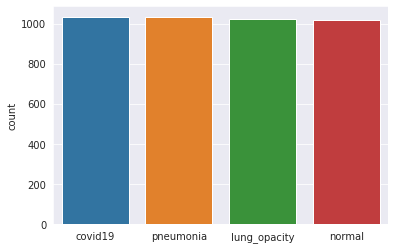

In [7]:
total_count = []
for i in train_data:
    total_count.append(labels[i[1]])
sn.set_style("darkgrid")
sn.countplot(total_count)

Class "Model" is prepared in order to train the model and make predictions

In [ ]:
class Model(ProcessImage):
    def __init__(self, learning_rate:float, epochs:int, debug:bool=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.opt = Adam(lr=self.learning_rate)
        self.model = None
        self.debug = debug
        
    def train(self,train_data, train_label, valid_data, valid_label, transfer_learning: bool = False):
        datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

        datagen.fit(train_data)
        
        
        if transfer_learning:
            base_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")
            base_model.trainable = False
            model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(4, activation="softmax")                                     
                                ])
        else:
            model = Sequential()
            model.add(Conv2D(16,3,activation="relu",input_shape=(256,256,3)))
            model.add(MaxPool2D())
            model.add(Conv2D(32, 3, activation="relu"))
            model.add(MaxPool2D())

            model.add(Conv2D(64, 3, activation="relu"))
            model.add(MaxPool2D())
            model.add(Dropout(0.4))
            model.add(Flatten())
            model.add(Dense(128,activation="relu"))
            model.add(Dense(4, activation="softmax"))
        logger.info(f"Model Summary: {model.summary()}")
        model.compile(optimizer = self.opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
        history = model.fit(train_data,train_label,epochs = self.epochs, batch_size=8,validation_data = (valid_data, valid_label))
        self.model = history
        
    def predict(self, test_data):
        acc = self.model.history["accuracy"]
        valid_acc = self.model.history["valid_accuracy"]
        loss = self.model.history["loss"]
        valid_loss = self.model.history["val_loss"]
        if debug:
            plt.figure(figsize=(15, 15))
            plt.subplot(2, 2, 1)
            plt.plot(100, acc, label='Training Accuracy')
            plt.plot(100, valid_acc, label='Validation Accuracy')
            plt.legend(loc='lower right')
            plt.title('Training and Validation Accuracy')

            plt.subplot(2, 2, 2)
            plt.plot(100, loss, label='Training Loss')
            plt.plot(epochs_range, val_loss, label='Validation Loss')
            plt.legend(loc='upper right')
            plt.title('Training and Validation Loss')
            plt.show()
        predictions = model.predict_classes(test_data)
        predictions = predictions.reshape(1,-1)[0]
        print(classification_report(test_label, predictions, target_names = ["covid19","pneumonia","lung_opacity","normal"]))
        
        

        
        

In [ ]:
cnn_model = Model(0.001,50)
model = models.train(x_train,y_train,x_valid,y_valid, transfer_learning= False)  # If you want to use transfer learning then it should be set as True


In [ ]:
model.predict(valid_data)